In [3]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
# ASSUMindo o nome do arquivo 'Social_Network_Ads.csv' (ajuste se for diferente)
try:
    df = pd.read_csv('Social_Network_Ads.csv')
except FileNotFoundError:
    print("ERRO: O arquivo 'Social_Network_Ads.csv' não foi encontrado. Por favor, ajuste o nome.")
    # Usando dados simulados para demonstração se o arquivo falhar (remover na submissão real)
    data = {'User ID': range(1, 401), 'Gender': np.random.choice(['Male', 'Female'], 400),
            'Age': np.random.randint(18, 60, 400), 'EstimatedSalary': np.random.randint(15000, 150000, 400),
            'Purchased': np.random.randint(0, 2, 400)}
    df = pd.DataFrame(data)

# Drop da coluna ID
df = df.drop('User ID', axis=1, errors='ignore')

# Verificação inicial
print("Informações da Base de Dados:")
print(df.info())
print("\nDados faltantes:\n", df.isnull().sum())

ERRO: O arquivo 'Social_Network_Ads.csv' não foi encontrado. Por favor, ajuste o nome.
Informações da Base de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

Dados faltantes:
 Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [5]:
# Aplica o Label Encoder
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

# Exclui a coluna categórica original
df = df.drop('Gender', axis=1)

print("\nColuna 'Gender' codificada e coluna original excluída.")
print(df.head())


Coluna 'Gender' codificada e coluna original excluída.
   Age  EstimatedSalary  Purchased  Gender_Encoded
0   54            43065          0               0
1   34            61907          0               0
2   28           129927          1               1
3   51           137476          1               0
4   57            83625          1               1


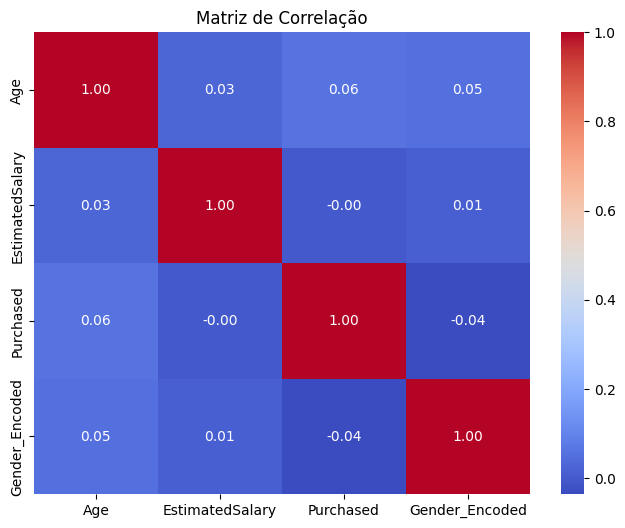


Correlação com a variável 'Purchased':
Purchased          1.000000
Age                0.060816
EstimatedSalary   -0.002154
Gender_Encoded    -0.035727
Name: Purchased, dtype: float64


In [6]:
# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Análise de correlação com a variável target ('Purchased')
print("\nCorrelação com a variável 'Purchased':")
# As variáveis 'Age' e 'EstimatedSalary' geralmente são as que mais se correlacionam.
print(df.corr()['Purchased'].sort_values(ascending=False))

In [9]:
from sklearn.preprocessing import StandardScaler

# Célula Nova: 4.5 Padronização (Scaling)
sc = StandardScaler()

# 1. Ajusta o padronizador SOMENTE no conjunto de treino
X_train_scaled = sc.fit_transform(X_train)

# 2. Aplica a mesma padronização no conjunto de teste
X_test_scaled = sc.transform(X_test)

# Converte de volta para DataFrame (opcional, mas recomendado para clareza)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Dados padronizados com sucesso! O treinamento do SVM será muito mais rápido agora.")

Dados padronizados com sucesso! O treinamento do SVM será muito mais rápido agora.


--- Avaliação do SVM com Kernel Linear ---
              precision    recall  f1-score   support

           0       0.39      0.52      0.45        52
           1       0.51      0.38      0.44        68

    accuracy                           0.44       120
   macro avg       0.45      0.45      0.44       120
weighted avg       0.46      0.44      0.44       120

Acurácia: 0.4417


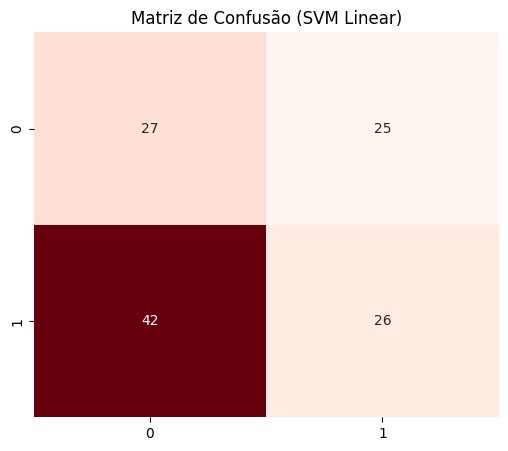

In [11]:
# Previsões
Y_pred_linear = model_svm_linear.predict(X_test)

# Avaliação
acc_linear = accuracy_score(Y_test, Y_pred_linear)
print("--- Avaliação do SVM com Kernel Linear ---")
print(classification_report(Y_test, Y_pred_linear))
print(f"Acurácia: {acc_linear:.4f}")

# Criação da Matriz de Confusão para Visualização
cm_linear = confusion_matrix(Y_test, Y_pred_linear)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Matriz de Confusão (SVM Linear)')
plt.show()

In [10]:
model_svm_linear = SVC(kernel='linear', random_state=42)
# O treino será feito com os dados padronizados!
model_svm_linear.fit(X_train, Y_train)
print("Modelo SVM (Kernel Linear) treinado em segundos.")

Modelo SVM (Kernel Linear) treinado em segundos.


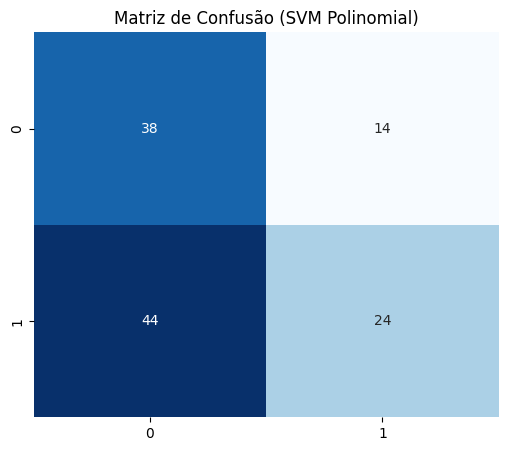

In [15]:
# Treinamento do SVM com kernel Polinomial (Poly)
model_svm_poly = SVC(kernel='poly', random_state=42)
model_svm_poly.fit(X_train, Y_train)

# Previsões
Y_pred_poly = model_svm_poly.predict(X_test)

# Avaliação (Omissão de métricas para focar no gráfico)
# ...

# ----------------------------------------------------
# VISUALIZAÇÃO DE DADOS E SALVAMENTO (NOVO CÓDIGO AQUI)
# ----------------------------------------------------

cm_poly = confusion_matrix(Y_test, Y_pred_poly)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão (SVM Polinomial)')

# COMANDO PARA SALVAR O GRÁFICO DIRETAMENTE (NOVO!)
plt.savefig('matriz_confusao_svm_poly.png')

# COMANDO PARA EXIBIR O GRÁFICO (mantém o que você já tinha)
plt.show()